<a href="https://colab.research.google.com/github/yooste/SOLUX_summer_data/blob/master/3%EC%A3%BC%EC%B0%A8/Kaggle_Survey_2017(~2/4)_0813.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

참고 URL:
   - [Data Science FAQ|Kaggle](https://www.kaggle.com/rounakbanik/data-science-faq)
   - [Novice to Grandmaster|Kaggle](https://https://www.kaggle.com/ash316/novice-to-grandmaster)
   - 설문조사의 결과를 바탕으로 데이터사이언스와 머신러닝과 관련된 인사이트를 얻어볼 수 있지 않을까 가설을 세운다.

## **캐글러를 대상으로 한 설문조사**
  - 설문기간: 2017년 8월 7일부터 8월 25일까지
  - 평균 응답 시간은 16.4분
  - 171개 국가 및 지역에서 16,716명의 응답자
  - 특정 국가 또는 지역에서 응답자가 50명 미만인 경우 익명을 위해 그룹을 '기타'그룹으로 그룹화
  - 설문 조사 시스템에 신고된 응답자를 스팸으로 분류하거나 취업 상태에 관한 질문에 답변하지 않은 응답자는 제외(이 질문은 첫 번째 필수 질문이기에 응답하지 않으면 응답자가 다섯 번째 질문 이후 진행되지 않음)
  - 대부분의 응답자는 이메일 목록, 토론 포함 및 소셜 미디어 Kaggle 채널을 통해 설문을 알게 됨
  - 급여데이터는 일부 통화에 대해서만 받고 해당 되는 통화에 기준하여 작성하도록 함
  - 미국 달러로 급여를 계산할 수 있도록 USD로 환산한 csv를 제공
  - 질문은 선택적
  - 모든 질문이 모든 응답자에게 보여지는 것은 아님
  - 취업을 한 사람과 학생을 나누어 다른 질문을 함
  - 응답자의 신원을 보호하기 위해 주관식과 객관식 파일로 분리
  - 객관식과 자유 형식 응답을 맞추기 위한 키를 제공하지 않음
  - 주관식 응답은 같은 행에 나타나는 응답이 반드시 동일한 설문 조사자가 제공하지 않도록 열 단위로 무작위 지정

## **데이터 파일**

5개의 데이터 파일을 제공
  - schema.csv: 설문 스키마가 있는 csv파일. 이 스키마에는 multipleChoiceResponse.csv 및 freeformResponses.csv의 각 열 이름에 해당하는 질문이 포함되어 있음.
  - multipleChoiceResponses.csv: 객관식 및 순위 질문에 대한 응답자의 답변, 각 행이 한 응답자의 응답
  - freeformResponses.csv: Kaggle의 설문 조사 질문에 대한 응답자의 주관식 답변. 임의로 지정되어 각 행이 같은 응답자를 나타내지 않음
  - conversionRates.csv: R 패키지 "quantmod"에서 2017년 9월 14일에 액세스 한 통화 변환율(USD)
  - RespondentTypeREADME.txt: schema.csv 파일의 "Asked" 열에 응답을 디코딩하는 스키마

In [1]:
 # 노트북 안에서 그래프를 그리기 위해
 %matplotlib inline

 # Import the standard Python Scientific Libraries
 import pandas as pd
 import numpy as np
 from scipy import stats
 import matplotlib.pyplot as plt
 import seaborn as sns
 import pandas.util.testing as tm

 # Suppress Deprecation and Incorrect Usage Warnings
 import warnings
 warnings.filterwarnings('ignore')  # warning이 보이지 않도록 처리

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
question = pd.read_csv('data/schema.csv')
question.shape

(290, 3)

In [3]:
question.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [4]:
question.tail()

,Column,Question,Asked
285,JobFactorRemote,How are you assessing potential job opportunit...,Learners
286,JobFactorIndustry,How are you assessing potential job opportunit...,Learners
287,JobFactorLeaderReputation,How are you assessing potential job opportunit...,Learners
288,JobFactorDiversity,How are you assessing potential job opportunit...,Learners
289,JobFactorPublishingOpportunity,How are you assessing potential job opportunit...,Learners


In [5]:
# 판다스로 선다형 객관식 문제에 대한 응답을 가져 옴
mcq = pd.read_csv('data/multipleChoiceResponses.csv', encoding='ISO-8859-1', low_memory=False)
mcq.shape # mcq의 행과 열을 알아보기
# 16716명이 응답 / 228개의 선다형 객관식 문제로 이루어짐

(4082, 228)

In [6]:
mcq.columns

Index(['GenderSelect', 'Country', 'Age', 'EmploymentStatus', 'StudentStatus',
       'LearningDataScience', 'CodeWriter', 'CareerSwitcher',
       'CurrentJobTitleSelect', 'TitleFit',
       ...
       'JobFactorExperienceLevel', 'JobFactorDepartment', 'JobFactorTitle',
       'JobFactorCompanyFunding', 'JobFactorImpact', 'JobFactorRemote',
       'JobFactorIndustry', 'JobFactorLeaderReputation', 'JobFactorDiversity',
       'JobFactorPublishingOpportunity'],
      dtype='object', length=228)

In [7]:
mcq.tail()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
4077,Male,United Kingdom,44.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Software Developer/Software Engineer,Poorly,Self-employed,TensorFlow,Deep learning,Python,Google Search,"Arxiv,Blogs,Friends network,Kaggle,Non-Kaggle ...",Very useful,Somewhat useful,NaN,NaN,NaN,Somewhat useful,Somewhat useful,NaN,Somewhat useful,Somewhat useful,Somewhat useful,Somewhat useful,Not Useful,Somewhat useful,NaN,NaN,NaN,Somewhat useful,"Data Elixir Newsletter,No Free Hunch Blog,Sira...",NaN,NaN,NaN,NaN,NaN,...,NaN,Sometimes,Sometimes,NaN,NaN,NaN,Sometimes,NaN,26-50% of projects,Entirely internal,IT Department,NaN,NaN,Flat files not in a database or cache (e.g. CS...,Share Drive/SharePoint,NaN,"Git,Subversion",Sometimes,50000,GBP,Has stayed about the same (has not increased o...,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4078,Male,Canada,19.0,Employed part-time,NaN,NaN,Yes,NaN,Scientist/Researcher,Fine,Employed by college or university,TensorFlow,Neural Nets,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Non-Kaggle online communities,Online courses,P...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,Very useful,Very useful,NaN,Very useful,Somewhat useful,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,Most of the time,NaN,NaN,Often,NaN,NaN,NaN,76-99% of projects,Entirely internal,Standalone Team,NaN,NaN,Row-oriented relational (e.g. MySQL/Microsoft ...,I don't typically share data,NaN,Generic non-cloud file sharing software (Email...,NaN,0,CAD,I am not currently employed,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4079,Male,United States,24.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,TensorFlow,Neural Nets,Python,Google Search,"Arxiv,Blogs,College/University,Kaggle,Stack Ov...",Very useful,Very useful,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,No Free Hunch Blog,1-2 years,Nice to have,Nice to have,Nice to have,Unnecessary,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

In [8]:
mcq.head(10)

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,CurrentEmployerType,MLToolNextYearSelect,MLMethodNextYearSelect,LanguageRecommendationSelect,PublicDatasetsSelect,LearningPlatformSelect,LearningPlatformUsefulnessArxiv,LearningPlatformUsefulnessBlogs,LearningPlatformUsefulnessCollege,LearningPlatformUsefulnessCompany,LearningPlatformUsefulnessConferences,LearningPlatformUsefulnessFriends,LearningPlatformUsefulnessKaggle,LearningPlatformUsefulnessNewsletters,LearningPlatformUsefulnessCommunities,LearningPlatformUsefulnessDocumentation,LearningPlatformUsefulnessCourses,LearningPlatformUsefulnessProjects,LearningPlatformUsefulnessPodcasts,LearningPlatformUsefulnessSO,LearningPlatformUsefulnessTextbook,LearningPlatformUsefulnessTradeBook,LearningPlatformUsefulnessTutoring,LearningPlatformUsefulnessYouTube,BlogsPodcastsNewslettersSelect,LearningDataScienceTime,JobSkillImportanceBigData,JobSkillImportanceDegree,JobSkillImportanceStats,JobSkillImportanceEnterpriseTools,...,WorkChallengeFrequencyITCoordination,WorkChallengeFrequencyHiringFunds,WorkChallengeFrequencyPrivacy,WorkChallengeFrequencyScaling,WorkChallengeFrequencyEnvironments,WorkChallengeFrequencyClarity,WorkChallengeFrequencyDataAccess,WorkChallengeFrequencyOtherSelect,WorkDataVisualizations,WorkInternalVsExternalTools,WorkMLTeamSeatSelect,WorkDatasets,WorkDatasetsChallenge,WorkDataStorage,WorkDataSharing,WorkDataSourcing,WorkCodeSharing,RemoteWork,CompensationAmount,CompensationCurrency,SalaryChange,JobSatisfaction,JobSearchResource,JobHuntTime,JobFactorLearning,JobFactorSalary,JobFactorOffice,JobFactorLanguages,JobFactorCommute,JobFactorManagement,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,Employed by a company that doesn't perform adv...,SAS Base,Random Forests,F#,Dataset aggregator/platform (i.e. Socrata/Kagg...,"College/University,Conferences,Podcasts,Trade ...",NaN,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,NaN,NaN,Somewhat useful,NaN,NaN,"Becoming a Data Scientist Podcast,Data Machina...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,Often,Most of the time,NaN,NaN,NaN,NaN,26-50% of projects,Do not know,Standalone Team,NaN,NaN,Document-oriented (e.g. MongoDB/Elasticsearch)...,"Company Developed Platform,I don't typically s...",NaN,"Mercurial,Subversion,Other",Always,NaN,NaN,I am not currently employed,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Python,Random Forests,Python,Dataset aggregator/platform (i.e. Socrata/Kagg...,Kaggle,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Becoming a Data Scientist Podcast,Siraj Raval ...",1-2 years,NaN,Nice to have,Unnecessary,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,NaN,Amazon Web services,Deep learning,R,Dataset aggregator/platform (i.e. Socrata/Kagg...,"Arxiv,College/University,Kaggle,Online courses...",Very useful,NaN,Somewhat useful,NaN,NaN,NaN,Somewhat useful,NaN,NaN,NaN,Very useful,NaN,NaN,NaN,NaN,NaN,NaN,Very useful,"FastML Blog,No Free Hunch Blog,Talking Machine...",1-2 years,Necessary,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"Asking friends, family members, or former coll...",1-2,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Impor

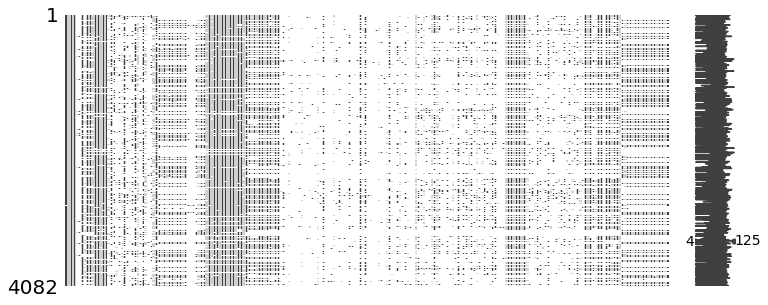

In [9]:
# missingno는 NaN 데이터들에 대해 시각화를 해준다.
# NaN 데이터의 컬링이 많아 아래 그래프만으로는 내용을 파악하기 어렵다.
import missingno as msno

msno.matrix(mcq, figsize=(12,5))

  - 16,716명의 데이터와 228개의 선다형 객관식문제와 62개의 주관식 질문에 대한 응답이다. (총 290개의 질문) 응답하지 않은 질문이 많음

## **설문 통계**

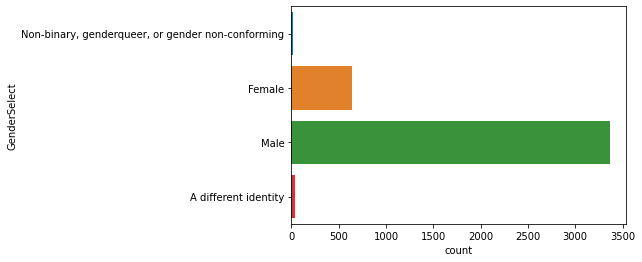

In [10]:
# 성별
# seaborn의 countplot을 사용하면 그래프를 쉽게 볼 수 있음
sns.countplot(y='GenderSelect', data=mcq)

여성보다는 남성의 비율이 훨씬 높은 편이다.

In [11]:
# 국가별 응답수
# value_counts(): 어떤 컬럼/Series의 unique value들을 count해주는 함수
con_df = pd.DataFrame(mcq['Country'].value_counts())
# print(con_df)
# 'country' 컬럼을 인덱스로 지정해 주고
con_df['국가'] = con_df.index
# 컬럼의 순서대로 응답 수, 국가로 컬럼명을 지정해 줌
con_df.columns = ['응답 수', '국가']
# index 컬럼을 삭제하고 순위를 알기 위해 reset_index()를 해준다.
# 우리나라는 18위 이고 전체 52개국에서 참여했지만 20위까지만 본다.
con_df = con_df.reset_index().drop('index', axis=1)
con_df.head(20)

,응답 수,국가
0,926,United States
1,709,India
2,225,Other
3,165,Russia
4,145,United Kingdom
5,130,Germany
6,124,France
7,115,Australia
8,102,Brazil
9,95,People 's Republic of China


In [12]:
# 연령에 대한 정보를 본다.
# describe를 해주면 'Age'에 대해 몇 개의 응답이 있는지 count할 수 있음 
# 또한 평균, 표준편차, 최대최소값 등을 나타낼 수 있음
mcq['Age'].describe()

count    4035.000000
mean       31.850558
std        10.264244
min         0.000000
25%        25.000000
50%        29.000000
75%        37.000000
max       100.000000
Name: Age, dtype: float64

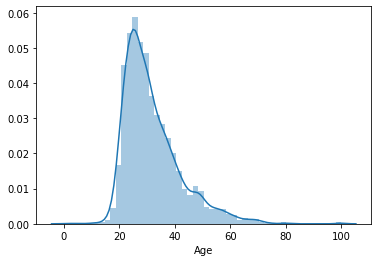

In [13]:
sns.distplot(mcq[mcq['Age']>0]['Age'])
# 나이가 0세 보다 많은 데이터에 대해 그래프를 그림

응답자의 대부분이 어리며, 20대부터 급격히 늘어나며, 30대가 가장 많다. 평균 나이는 32세다.

## **학력**

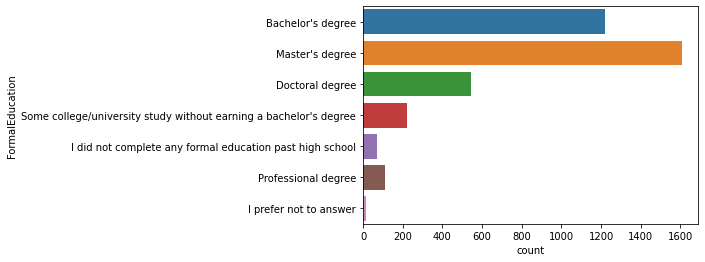

In [14]:
# FormalEducation이라는 항목에 대해 시각화를 함
sns.countplot(y='FormalEducation', data=mcq)

학사 학위를 가진 사람보다 석사 학위를 가지고 있는 사람이 많으며, 박사학위를 가지고 있는 사람들도 많다.

## **전공**

In [15]:
# value_counts를 사용하면 그룹화 된 데이터의 카운트 값을 보여준다.
# normalize=True 옵션을 사용하면,
# 해당 데이터가 전체 데이터에서 어느 정도의 비율을 차지하는지 알 수 있다.
mcq_major_count = pd.DataFrame(mcq['MajorSelect'].value_counts()) # 응답 수 count 
mcq_major_percent = pd.DataFrame(mcq['MajorSelect'].value_counts(normalize=True)) # 비율 구하기
mcq_major_df = mcq_major_count.merge(mcq_major_percent, left_index=True, right_index=True) # 하나의 테이블로 보기 위해 merge 사용
mcq_major_df.columns = ['응답 수', '비율']
mcq_major_df  # 데이터 프레임 출력  

,응답 수,비율
Computer Science,1131,0.329834
Mathematics or statistics,577,0.168271
Electrical Engineering,345,0.100612
Engineering (non-computer focused),304,0.088656
Other,211,0.061534
Physics,203,0.059201
"Information technology, networking, or system administration",181,0.052785
A social science,158,0.046078
Biology,75,0.021872
Management information systems,67,0.019539


컴퓨터 전공자들이 33%로 가장 많으며, 다음으로 수학, 공학, 전기 공학 순이다.

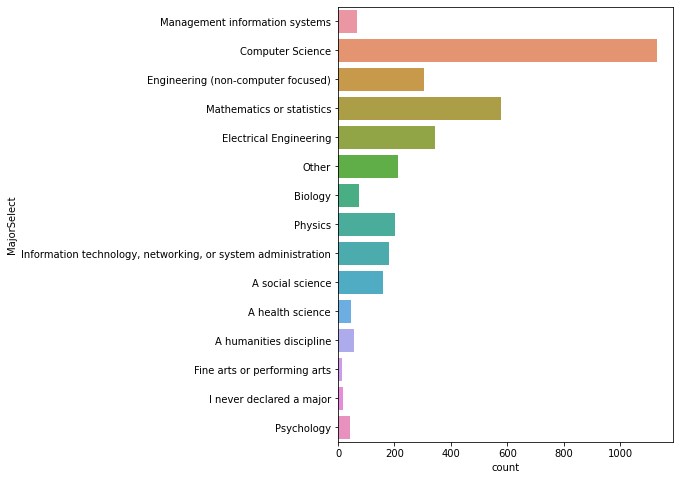

In [16]:
# 재학 중인 사람들의 전공 현황
plt.figure(figsize=(6,8))
sns.countplot(y='MajorSelect', data=mcq)

## **취업 여부**

In [17]:
mcq_es_count = pd.DataFrame(mcq['EmploymentStatus'].value_counts()) # 응답 수 구하기
mcq_es_percent = pd.DataFrame(mcq['EmploymentStatus'].value_counts(normalize=True)) # 비율 구하기
mcq_es_df = mcq_es_count.merge(mcq_es_percent, left_index=True, right_index = True) # 데이터프레임 합치기
mcq_es_df.columns = ['응답 수', '비율']
mcq_es_df

,응답 수,비율
Employed full-time,2600,0.636943
"Not employed, but looking for work",588,0.144047
"Independent contractor, freelancer, or self-employed",318,0.077903
"Not employed, and not looking for work",263,0.064429
Employed part-time,189,0.046301
I prefer not to say,92,0.022538
Retired,32,0.007839


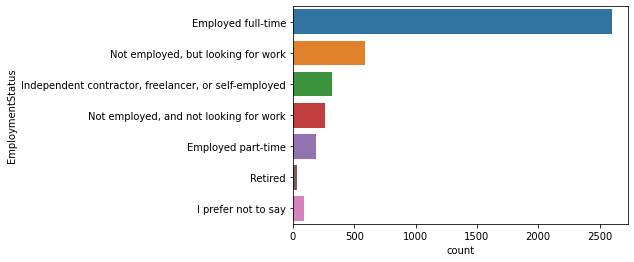

In [18]:
sns.countplot(y='EmploymentStatus', data=mcq) # 위의 데이터프레임 시각화

응답자의 대부분이 65%가 풀타임으로 일하고 있으며, 그 다음으로 구직자가 12%다.

## **프로그래밍 경험**

  - 'Tenure' 항목은 데이터사이언스 분야에서 코딩 경험이 얼마나 되는지에 대한 질문이다. 대부분이 5년 미만이며, 특히 1~2년의 경험을 가진 사람들이 많다.

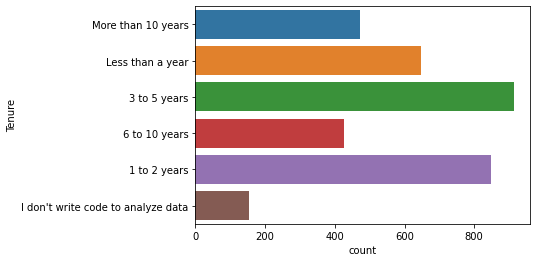

In [19]:
sns.countplot(y='Tenure', data=mcq)

The number of interviewees in Korea: 45


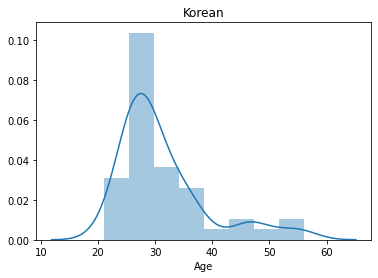

In [20]:
korea = mcq.loc[(mcq['Country']=='South Korea')] # 우리나라 데이터만 추출하여 korea에 저장

print('The number of interviewees in Korea: '+str(korea.shape[0]))

sns.distplot(korea['Age'].dropna()) # NaN 데이터는 제거
plt.title('Korean')
plt.show()

In [21]:
pd.DataFrame(korea['GenderSelect'].value_counts())  # 성별 분포 체크

,GenderSelect
Male,33
Female,11
A different identity,1


Text(0.5, 1.0, 'Korean')

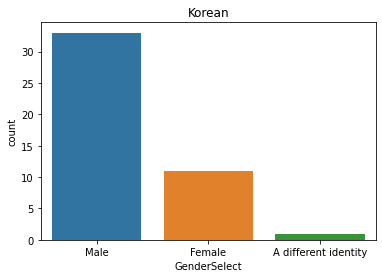

In [22]:
sns.countplot(x='GenderSelect', data=korea) # 성별 데이터의 시각화
plt.title('Korean')

Text(0.5, 1.0, 'korean Male')

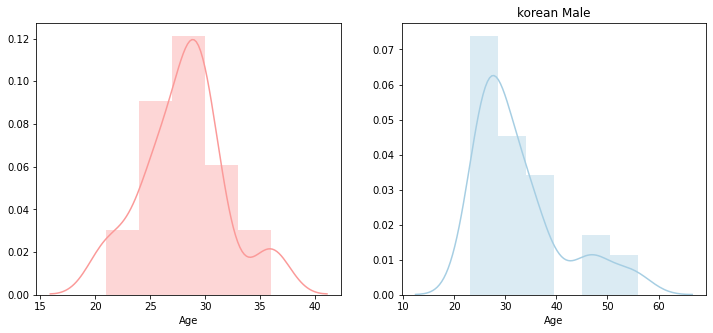

In [23]:
figure, (ax1, ax2) = plt.subplots(ncols=2)  # subplots을 이용하면 2개의 그래프를 나타낼 수 있다.

figure.set_size_inches(12,5)
# 여성에 대한 데이터
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Female'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[4], ax=ax1)
plt.title('korean Female')
# 남성에 대한 데이터
sns.distplot(korea['Age'].loc[korea['GenderSelect']=='Male'].dropna(),
             norm_hist=False, color=sns.color_palette("Paired")[0], ax=ax2)
plt.title('korean Male')

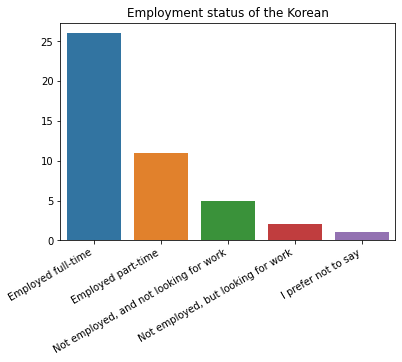

In [24]:
sns.barplot(x=korea['EmploymentStatus'].unique(), y=korea['EmploymentStatus'].value_counts())
plt.xticks(rotation=30, ha='right') # 글자 기울기 설정 / 오른쪽으로 30도 기울임
plt.title('Employment status of the Korean')
plt.ylabel('')
plt.show()

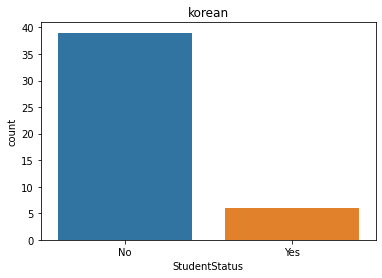

In [25]:
# 학생인지 아닌지에 대한 응답
korea['StudentStatus'] = korea['StudentStatus'].fillna('No')
sns.countplot(x='StudentStatus', data=korea)
plt.title('korean')
plt.show()

In [26]:
full_time=mcq.loc[(mcq['EmploymentStatus']=='Employed full-time')]
print(full_time.shape)  # full-time 응답자 수
looking_for_job=mcq.loc[(mcq['EmploymentStatus']=='Not employed, but looking for work')]
print(looking_for_job.shape)  # 구직 중인 응답자 수

(2600, 228)
(588, 228)


## **자주 묻는 질문 FAQ**
  - 초보자들이 묻는 가장 일반적인 질문에 대한 답을 시각화 해본다.

# **Q1. Python과 R 중 어떤 언어를 배워야 할까요?**

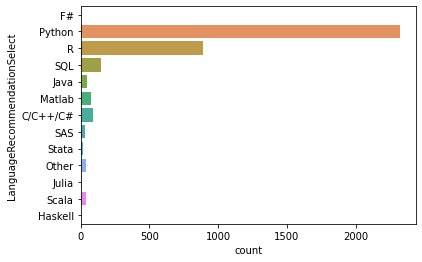

In [27]:
sns.countplot(y='LanguageRecommendationSelect', data=mcq)

파이썬을 명확하게 선호하고 있는 것으로 보여지며, 전문가와 강사들이 선호하는 언어를 알아본다.

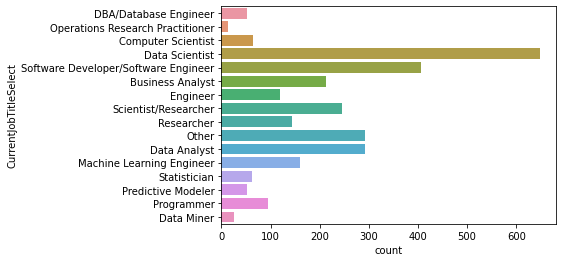

In [28]:
# 현재 하고 있는 일
sns.countplot(y=mcq['CurrentJobTitleSelect'])

In [29]:
# 현재 하고 있는 일에 대한 전체 응답수
mcq[mcq['CurrentJobTitleSelect'].notnull()]['CurrentJobTitleSelect'].shape

(2886,)

(2424, 228)


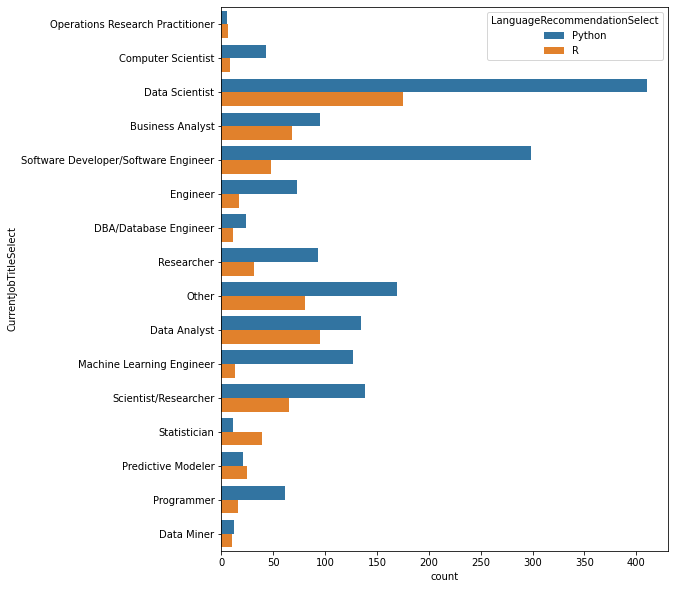

In [30]:
# 현재 하고 있는 일에 대한 응답을 해준 사람 중 Python과 R을 사용하는 사람
# 응답자들이 실제 업무에서 어떤 언어를 주로 사용하는지 볼 수 있다.
data=mcq[(mcq['CurrentJobTitleSelect'].notnull())&(
    (mcq['LanguageRecommendationSelect']=='Python') | (
        mcq['LanguageRecommendationSelect']=='R'))]
print(data.shape)
plt.figure(figsize=(8,10))
sns.countplot(y='CurrentJobTitleSelect', hue='LanguageRecommendationSelect', data=data)

데이터사이언티스트들은 Python을 주로 사용하지만 R을 사용하는 사람들도 제법 된다. 하지만 소프트웨어 개발자들은 Python을 훨씬 더 많이 사용하며, Python보다 R을 더 많이 사용하는 직업군은 통계 학자들이다.

# **Q2. 데이터 사이언스 분야에서 앞으로 크게 주목받을 것은 무엇일까요?**

  - 관련 분야의 종사자가 아니더라도 빅데이터, 딥러닝, 뉴럴네트워크 같은 용어에 대해 알고 있다. 응답자들이 내년에 가장 흥미로운 기술이 될 것이라 응답한 것이다.

# **데이터사이언스 툴**

In [31]:
mcq_ml_tool_count = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts())
mcq_ml_tool_percent = pd.DataFrame(
    mcq['MLToolNextYearSelect'].value_counts(normalize=True))
mcq_ml_tool_df = mcq_ml_tool_count.merge(mcq_ml_tool_percent, left_index = True, right_index=True).head(20)
mcq_ml_tool_df.columns=['응답 수','비율']
mcq_ml_tool_df

,응답 수,비율
TensorFlow,869,0.236013
Python,541,0.146931
R,317,0.086095
Spark / MLlib,269,0.073058
Hadoop/Hive/Pig,153,0.041554
Other,151,0.041010
Jupyter notebooks,124,0.033677
I don't plan on learning a new tool/technology,117,0.031776
Amazon Machine Learning,109,0.029603
Google Cloud Compute,104,0.028246


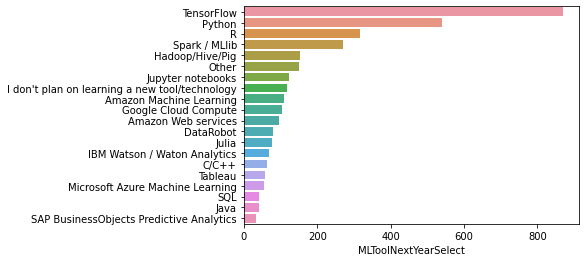

In [32]:
data=mcq['MLToolNextYearSelect'].value_counts().head(20)
sns.barplot(y=data.index, x=data)

구글의 딥러닝 프레임워크 텐서플로우가 23%로 가장 많은 관심을 받을 것이라 응답했다. 그리고 Python이 15%, R은 8%로 따르고 있다.

클라우드는 Amazon ML, GCP, AWS, MS Azure ML, IBM Watson 순으로 응답되었다.

**데이터사이언스 방법 Data Science Methods**

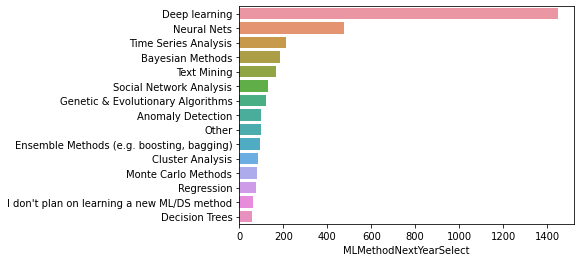

In [33]:
data=mcq['MLMethodNextYearSelect'].value_counts().head(15) # 상위 15개를 찍어봄
sns.barplot(y=data.index, x=data)

응답에 대한 통계를 보면 딥러닝과 뉴럴넷이 엄청나게 인기가 있을 것이고 시계열 분석, 베이지안, 텍스트 마이닝 등의 내용이 있다. 중간 쯤에 부스팅과 배깅 같은 앙상블 메소드도 있다. 

# **Q3. 어디에서 데이터 사이언스를 배워야 할까요?**

In [34]:
mcq['LearningPlatformSelect'] = mcq['LearningPlatformSelect'].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(
    lambda x: pd.Series(x['LearningPlatformSelect']),
    axis=1).stack().reset_index(level=1, drop=True)
s.name = 'platform'

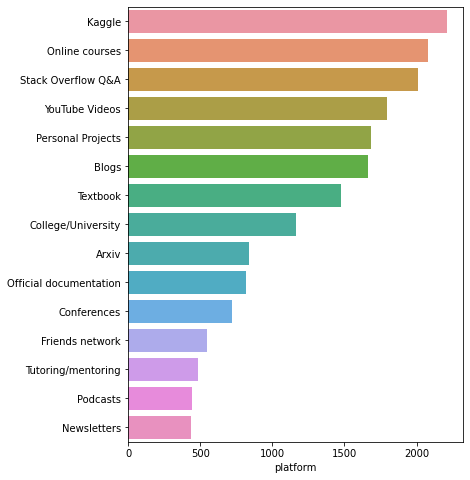

In [35]:
plt.figure(figsize=(6,8))
data=s[s!='nan'].value_counts().head(15) # 상위 15개 출력
sns.barplot(y=data.index, x=data) 

- Kaggle은 응답자들 사이에서 가장 인기있는 학습 플랫폼
- 그러나 이 설문 조사를 실시한 곳이 Kaggle 이기 때문에 응답이 편향되었을 수 있음
- 온라인 코스, 스택 오버플로 및 유튜브 상위 5대 최우수 학습 플랫폼은 대학 학위나 교과서의 중요도보다 높다.

In [36]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('LearningCategory')]
print(qc.shape)
qc

(7, 3)


,Column,Question,Asked
91,LearningCategorySelftTaught,What percentage of your current machine learni...,All
92,LearningCategoryOnlineCourses,What percentage of your current machine learni...,All
93,LearningCategoryWork,What percentage of your current machine learni...,All
94,LearningCategoryUniversity,What percentage of your current machine learni...,All
95,LearningCategoryKaggle,What percentage of your current machine learni...,All
96,LearningCategoryOther,What percentage of your current machine learni...,All
97,LearningCategoryOtherFreeForm,What percentage of your current machine learni...,All


In [37]:
# 유용한 플랫폼을 use_features에 모아둠
use_features = [x for x in mcq.columns if x.find('LearningPlatformUsefulness')!=-1]

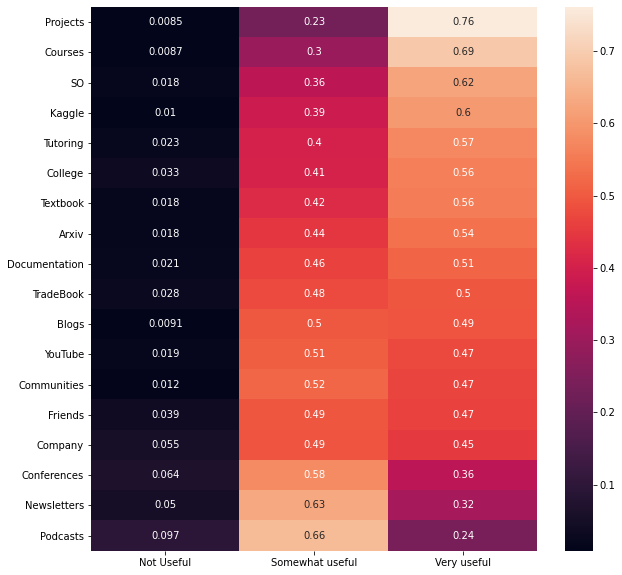

In [38]:

# 학습플랫폼과 유용함에 대한 연관성을 살펴본다.
fdf = {}
for feature in use_features:
    a = mcq[feature].value_counts()
    a = a/a.sum()
    fdf[feature[len('LearningPlatformUsefulness'):]] = a

fdf = pd.DataFrame(fdf).transpose().sort_values(
    'Very useful', ascending=False)

# 학습플랫폼들이 얼마나 유용한지에 대한 상관관계를 그려본다.
plt.figure(figsize=(10,10))
sns.heatmap(
    fdf.sort_values(
        "Very useful", ascending=False), annot=True)
# 1에 가까울수록 유용하다

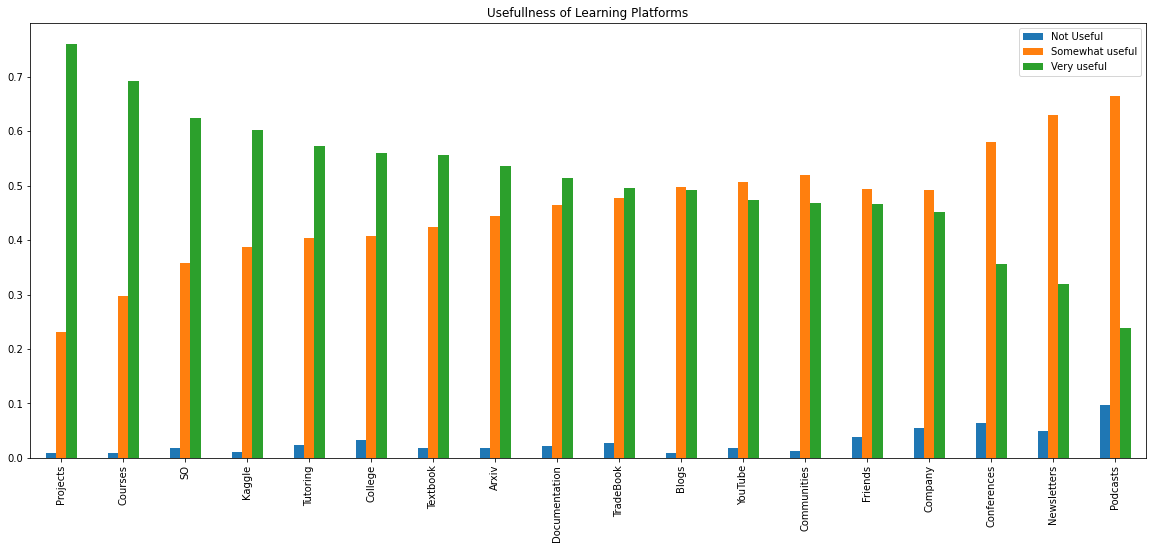

In [39]:
# 유용함의 정도를 각 플랫폼별로 그룹화해서 본다.
fdf.plot(kind='bar', figsize=(20,8),
         title='Usefullness of Learning Platforms')

실제로 프로젝트를 해보는 것에 대해 74.7%의 응답자가 응답했고 매우 유용하다고 표시했다. SO는 스택오버플로우이고, 캐글, 수업, 책이 도움이 많이 되는 편이다. 팟캐스트는 매우 유용하지 않지만 때때로 유용하다는 응답은 가장 많았다.

In [40]:
# 파이차트를 그리기 위해 질문들 카테고리를 모았다.
cat_features = [x for x in mcq.columns if x.find('LearningCategory') != -1]
cat_features

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [41]:
cdf = {}
for feature in cat_features:
  cdf[feature[len('LearningCategory'):]]=mcq[feature].mean()  # mean(): 평균값 구하기

# 파이차트를 그리기 위해 평균 값을 구해와서 담아준다.
cdf = pd.Series(cdf)
cdf

SelftTaught      33.921478
OnlineCourses    27.237313
Work             14.815205
University       16.881309
Kaggle            5.687933
Other             1.635444
dtype: float64

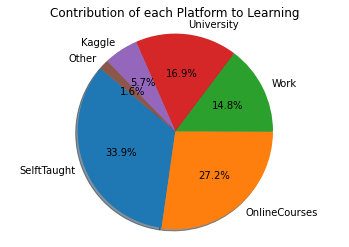

In [42]:
# 학습 플랫폼 별 도움이 되는 정도를 그려본다.
plt.pie(cdf, labels=cdf.index, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')
plt.title("Contribution of each Platform to Learning")
plt.show()

개인프로젝트를 해보는 것이 가장 많은 도움이 되었으며, 온라인코스와 대학, 업무 그 다음으로 캐글을 통해 배웠다고 응답되었다.

# **Q4. 데이터과학을 위해 높은 사양의 컴퓨터가 필요한가요?**

In [43]:
# 설문내용과 누구에게 물어봤는지를 찾아봄
qc = question.loc[question['Column'].str.contains('HardwarePersonalProjectsSelect')]
print(qc.shape)
qc

(1, 3)


,Column,Question,Asked
74,HardwarePersonalProjectsSelect,Which computing hardware do you use for your p...,Learners


In [44]:
mcq[mcq['HardwarePersonalProjectsSelect'].notnull()]['HardwarePersonalProjectsSelect'].shape

(1438,)

In [46]:
mcq['HardwarePersonalProjectsSelect'
   ] = mcq['HardwarePersonalProjectsSelect'
          ].astype('str').apply(lambda x: x.split(','))
s = mcq.apply(lambda x: 
              pd.Series(x['HardwarePersonalProjectsSelect']),
              axis=1).stack().reset_index(level=1, drop=True)
s.name = 'hardware'

In [47]:
s=s[s!='nan']

In [48]:
pd.DataFrame(s.value_counts())

,hardware
['nan'],2644
['Basic laptop (Macbook)'],596
' Azure',236
' GCE ...)'],190
['Basic laptop (Macbook)',186
['Gaming Laptop (Laptop + CUDA capable GPU)'],160
['Laptop + Cloud service (AWS',129
'Laptop + Cloud service (AWS',107
['Traditional Workstation'],95
['Laptop or Workstation and local IT supported servers'],95


맥북을 사용하는 응답자가 가장 많고, 랩탑과 함께 클라우드를 사용하는 사람들이 그 다음이고 적당한 GPU를 가진 게임용 노트북을 사용하는 사례가 그 다음이다.

# **Q5. 데이터 사이언스 공부에 얼마나 많은 시간을 사용 하는지?**

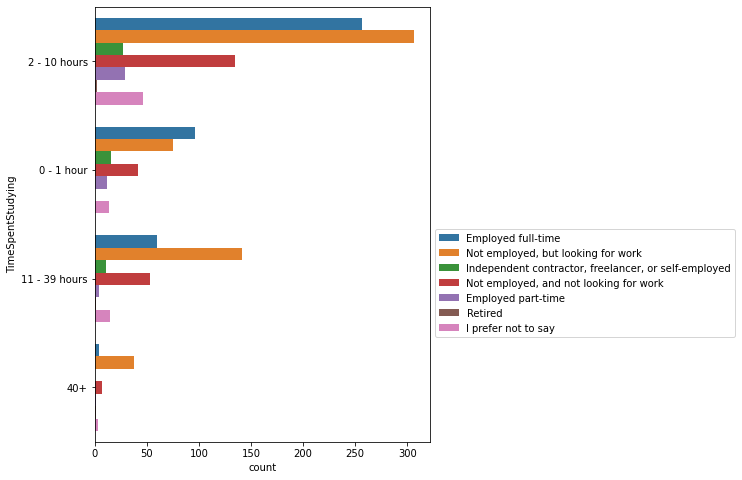

In [50]:
plt.figure(figsize=(6,8))
sns.countplot(y='TimeSpentStudying',
              data=mcq,
              hue='EmploymentStatus').legend(loc='center_left', bbox_to_anchor=(1,0.5))
# hue에 현재 직업을 가지고 있는지를 판별하여 나타냄

풀타임으로 일하는 사람들은 2~10시간 일하는 비율이 높으며, 풀타임으로 일하는 사람보다 일을 찾고 있는 사람들이 더 많은 시간을 공부하는 편이다.

하지만 응답자 중 대부분이 풀타임으로 일하고 있는 사람들이라는 것을 고려할 필요가 있다.

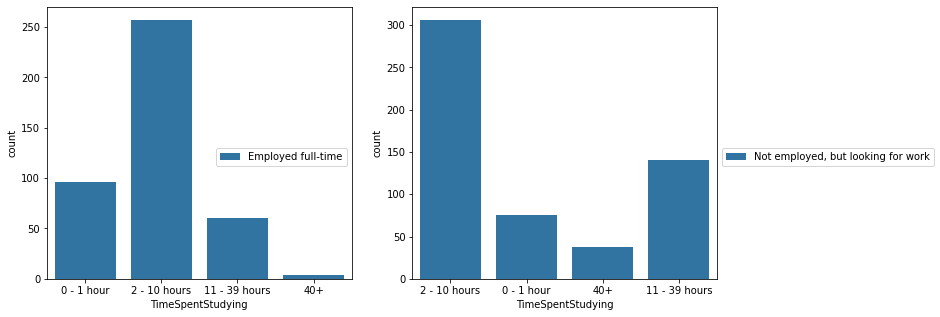

In [51]:
figure, (ax1, ax2) = plt.subplots(ncols=2)  # 2개의 그래프를 나란히 그리기 위함

figure.set_size_inches(12,5)
sns.countplot(x='TimeSpentStudying', 
              data=full_time, 
              hue='EmploymentStatus', ax=ax1).legend(loc='center_right', bbox_to_anchor=(1,0.5))

sns.countplot(x='TimeSpentStudying', data=looking_for_job,
              hue='EmploymentStatus', ax=ax2).legend(loc='center_right',
                                                     bbox_to_anchor=(1,0.5))